### Copyright 2022 Edward Späth, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md

## Tree traversal algorithms (Pre-, In-, Postorder)

## Global variables for storing information

In [1]:
preorder_steps = []
inorder_steps = []
postorder_steps = []
max_index = None

## Output colors

In [2]:
# Defaults are 'black', 'white', 'black'
COL_NODE = 'black'
COL_FC_NODE = 'white'
COL_EDGE = 'black'
# Set "visibility" of invisible nodes
# 'dotted' for seing invisible nodes (debugging), 'invis' for hiding them
#INVISIBLE_NODE_STYLE = 'dotted'
INVISIBLE_NODE_STYLE = 'invis'

## Helper functions for easier access to children/parents of a given element in tree (heap)

In [3]:
def parent(i):
    if i <= 0: # In case parent(0) is called, instead of returning -1, it is safer to return None instead, since -1 is a valid index in python
        return None
    else:
        return (i-1)//2 # '//' means division with floor function (round down)

def left(i):
    return 2*i+1

def right(i):
    return 2*i+2

## Tree traversal algorithms

In [4]:
preorder_step = 1
def preorder_treewalk(x, tree):
    global preorder_step, preorder_steps
    if tree[x] == 1:
        # Inspect node
        preorder_steps[x] = preorder_step
        preorder_step += 1
        # Visit left
        if left(x) <= max_index:
            preorder_treewalk(left(x), tree)
        # Visit right
        if right(x) <= max_index:
            preorder_treewalk(right(x), tree)

In [5]:
inorder_step = 1
def inorder_treewalk(x, tree):
    global inorder_step, inorder_steps
    if tree[x] == 1:
        # Visit left
        if left(x) <= max_index:
            inorder_treewalk(left(x), tree)
        # Inspect node
        inorder_steps[x] = inorder_step
        inorder_step += 1
        # Visit right
        if right(x) <= max_index:
            inorder_treewalk(right(x), tree)

In [6]:
postorder_step = 1
def postorder_treewalk(x, tree):
    global postorder_step, postorder_steps
    if tree[x] == 1:
        # Visit left
        if left(x) <= max_index:
            postorder_treewalk(left(x), tree)
        # Visit right
        if right(x) <= max_index:
            postorder_treewalk(right(x), tree)
        # Inspect node
        postorder_steps[x] = postorder_step
        postorder_step += 1

## Tree visualization

In [7]:
from graphviz import Graph
def draw_tree(tree, traversal_type):
    dot = Graph()
    # Add nodes
    for index, node in enumerate(tree):
        # All existing nodes (not invisible ones) have the value 1
        if node == 1:
            dot.attr('node', style='filled', fillcolor=COL_NODE, fontcolor=COL_FC_NODE)
            # Inputstring is the number whih represents when the node was visited (depending on traversal type)
            if traversal_type == 'PREORDER':
                inputstring = str(preorder_steps[index])
            elif traversal_type == 'INORDER':
                inputstring = str(inorder_steps[index])
            else:
                inputstring = str(postorder_steps[index])
        else:
            dot.attr('node', style=INVISIBLE_NODE_STYLE)
            inputstring = '__'
        dot.node(str(index), inputstring, ordering='out')
        # Calculate where invisible nodes belong
        if left(index) <= max_index or right(index) <= max_index:
            dot.attr('node', style=INVISIBLE_NODE_STYLE)
            dot.node('invis' + str(index), '__', ordering='out')
    # Add edges
    for index, node in enumerate(tree):
        # Edge between node and left child
        if left(index) <= max_index:
            if node == 0 or tree[left(index)] == 0:
                dot.attr('edge', style=INVISIBLE_NODE_STYLE)
            else:
                dot.attr('edge', style="filled", color=COL_EDGE)
            dot.edge(str(index), str(left(index)), weight='0')
        # Edge between node and middle node (invisible)
        if left(index) <= max_index or right(index) <= max_index:
            if left(index) != 0 or right(index) != 0:
                dot.attr('edge', style=INVISIBLE_NODE_STYLE)
                dot.edge(str(index), 'invis' + str(index), weight='10')
        # Edge between node and right child
        if right(index) <= max_index:
            if node == 0 or tree[right(index)] == 0:
                dot.attr('edge', style=INVISIBLE_NODE_STYLE)
            else:
                dot.attr('edge', style="filled", color=COL_EDGE)
            dot.edge(str(index), str(right(index)), weight='0')
    # Select traversal type name for label
    if traversal_type == 'PREORDER':
        labelinput = 'Preorder traversal'
    elif traversal_type == 'INORDER':
        labelinput = 'Inorder traversal'
    else:
        labelinput = 'Postorder traversal'
    dot.attr(labelloc='t', label=labelinput)
    display(dot)

## Adjust input and call algorithms

In [8]:
import math
def check_tree(tree_input):
    # Convert tree string into a list if it is not already
    if isinstance(tree_input, str):
        tree = []
        for i in range(0, len(tree_input)):
            if tree_input[i] == '0' or tree_input[i] == '1':
                tree.append(int(tree_input[i]))
    else:
        tree = tree_input
    # Make sure that every node has a parent (except for the root node of course)
    for i in reversed(range(1, len(tree))):
        if tree[i] == 1 and tree[parent(i)] == 0:
            print("\nERROR: Index", i, "is supposed to have a parent at index", parent(i), ", which does not exist")
            return None
    # Remove redundant 0's at the end, so that no unnecessary levels can be created
    for i in reversed(range(0, len(tree))):
        if tree[i] == 0:
            del tree[i]
        else:
            break
    # Fill up the tree wilh invisible nodes until all necessary levels are full (for balancing)
    # Since all levels have an amount of nodes corresponding to a power of 2, a tree has all its levels completed when you can add 1 to the
    # amount of nodes and then have a power of 2. This is the case if the base 2 logarithm of the amount of nodes + 1 returns a whole number.
    # If you compare the result with the rounded down version, then it is a whole number if the two results match up, since in that case there was
    # no reason to round down, hence all levels being full.
    while math.log2(len(tree)+1) != math.floor(math.log2(len(tree)+1)):
        tree.append(0)
    return tree

In [9]:
def execute_algorithms(tree_string):
    global preorder_steps, inorder_steps, postorder_steps, max_index
    # Convert tree into a list and check if it is correct, remove redundant nodes, add nodes for balancing
    tree = check_tree(tree_string)
    # Make sure that tree is correct (check_tree returns "None" if it is not)
    if not tree:
        return
    # Configure data storage, calculate maximum index
    preorder_steps = [-1] * (len(tree))
    inorder_steps = [-1] * (len(tree))
    postorder_steps = [-1] * (len(tree))
    max_index = len(tree)-1
    # Call algorithms
    preorder_treewalk(0, tree)
    inorder_treewalk(0, tree)
    postorder_treewalk(0, tree)
    # Visualize results
    draw_tree(tree, 'PREORDER')
    draw_tree(tree, 'INORDER')
    draw_tree(tree, 'POSTORDER')
    # Reset results
    reset_results()

In [10]:
def reset_results():
    global preorder_step, inorder_step, postorder_step
    preorder_step, inorder_step, postorder_step = 1, 1, 1

## Randomly generate a tree

In [11]:
import random
def generate_random_tree(max_height, chance_for_node_not_existing):
    maximum_amount_of_nodes = 2 ** max_height -1 # 2 to the power of max_height - 1 
    tree = [-1] * maximum_amount_of_nodes
    # Root always exists
    tree[0] = 1
    for i in range(1, maximum_amount_of_nodes):
        # Node can only be added if its parent exists
        if tree[parent(i)] == 1:
            random_number = random.randint(0, 99)
            if random_number < chance_for_node_not_existing:
                tree[i] = 0
            else:
                tree[i] = 1
        else:
            tree[i] = 0
    return tree

## Example

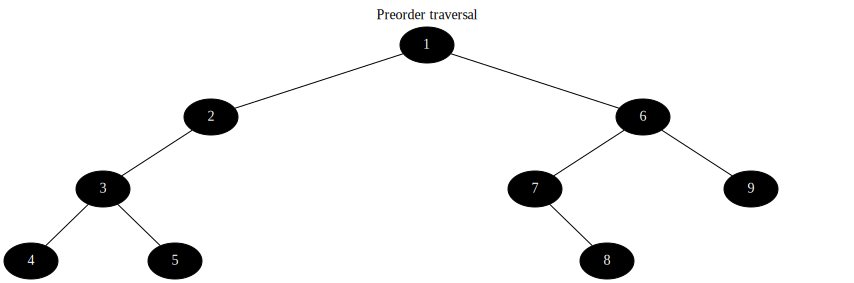

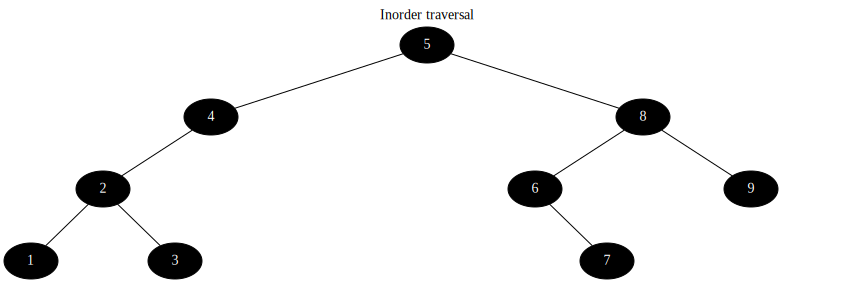

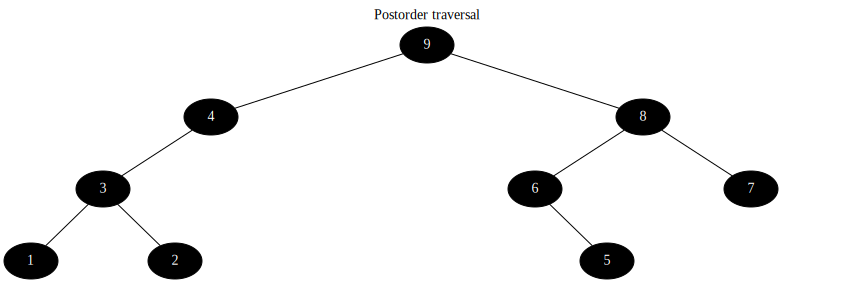

In [12]:
# A binary tree can be uniquely identified by a string of 1's and 0's.
# It is only possible if missing nodes are marked with a 0, it would be ambivalent otherwise.
# Existing nodes are marked with a 1 instead
# Everything other than 1's and 0's is ignored, meaning you can use slashes, backslashes or something else for formatting just like I did below.
# The tree below is equivalent to tree = "1 11 1011 110001", which is also the same as
# adding two 0's to the back of the string, which would be done automatically anyways
# Essentially imagine it as a list with an index starting at 0, increasing from top left, to bottom right (level-by-level). See below!

# tree indices:
#
#              0
#          ---   ---
#         /         \
#        1           2
#
#      /    \      /    \
#     3     4     5      6
#
#   /  \
#  7   ...

tree = """

                         1
                -------     -------
               /                   \
              1                     1

          /      \               /     \
         1        0             1       1

      /    \    /    \        /   \
     1      1  0      0      0     1


"""
execute_algorithms(tree)

## Yet another example

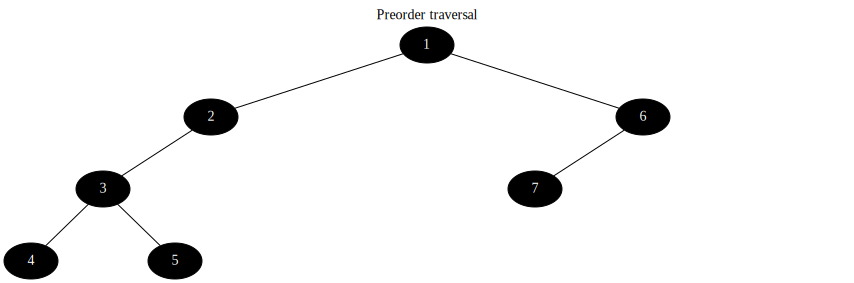

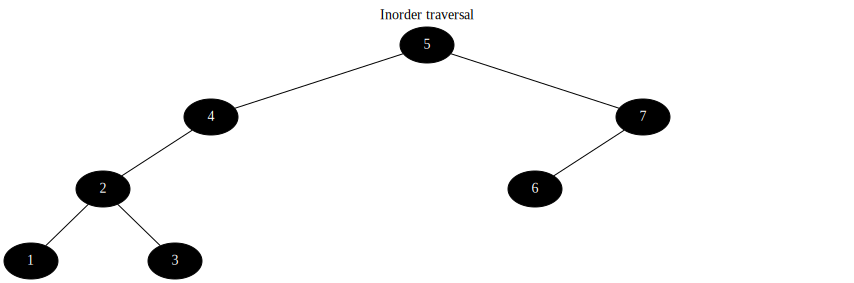

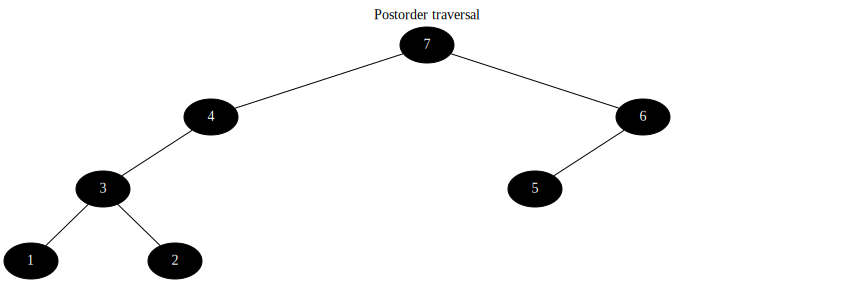

In [13]:
tree = """

              1

         /        \
        1          1

     /    \      /   \
    1      0    1     0

  /   \
 1     1


"""
execute_algorithms(tree)

## Tree traversal algorithms for a randomly generated tree

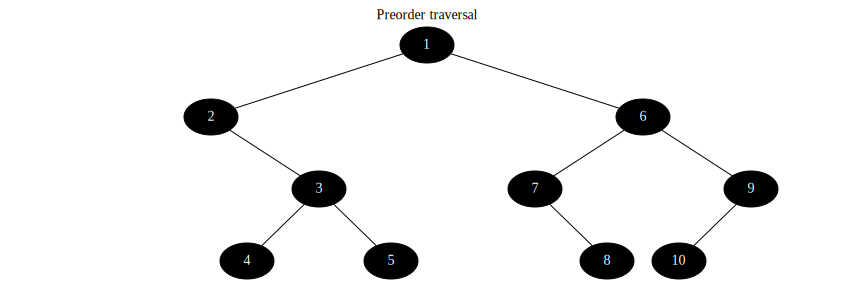

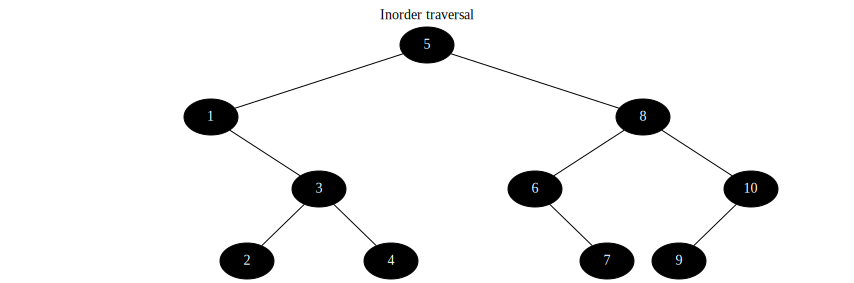

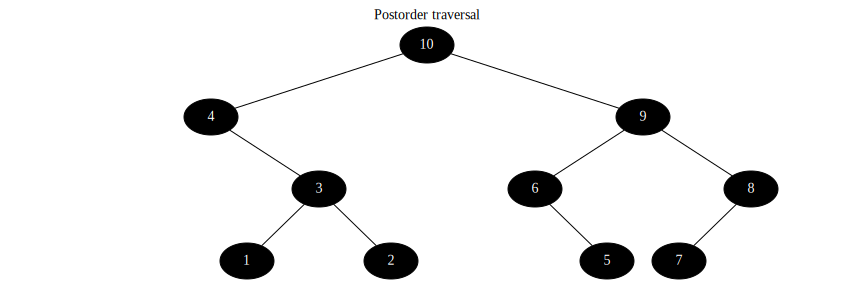

In [14]:
# Value given in percent (%), ranging from 0 to 100.
# The chance for a node to not exist. If a node does not exist, then that node's subtrees do not exist either
chance_for_node_not_existing = 20
# How high the tree is allowed to be
max_height = 4

tree = generate_random_tree(max_height, chance_for_node_not_existing)
execute_algorithms(tree)

## Your tests go here...

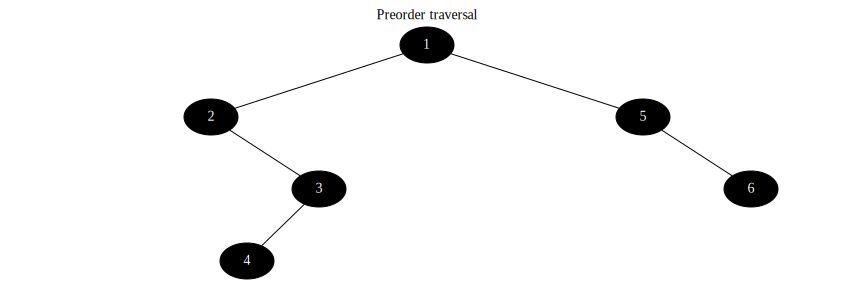

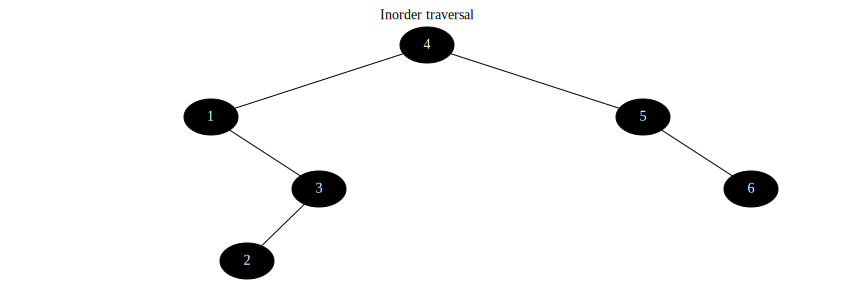

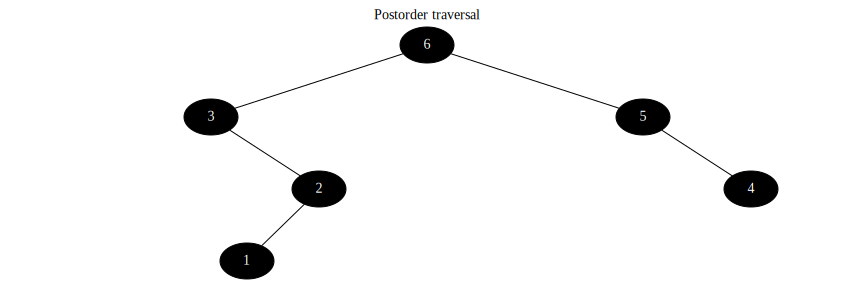

In [15]:
tree = """

              1

         /         \
        1           1

     /     \      /   \
    0       1    0     1

  /  \    /
 0    0  1


"""
execute_algorithms(tree)